<a href="https://colab.research.google.com/github/esundbla/Spring_2022/blob/main/PlantLab_MSU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import csv
import matplotlib.pyplot as plt
import numpy as np
import os


def maskTool(bgr):
  try:
    length, width, extra = bgr.shape
  except:
    return 0
    
  mask = cv.inRange(bgr, np.array([50,135,80]), np.array([125,255,165]))
  result = cv.bitwise_and(bgr, bgr, mask= mask)
  return np.count_nonzero(result)



if __name__=="__main__":
    header = ['Date', 'Value']
    directory = '/content/drive/MyDrive/Research/BasilProject/DATA'
    # Access sample
    for sample in os.listdir(directory): 
        newfile = directory + '/Bulk' + sample + '.csv'
        sample_green_val =[]
        sample_time_val = []
        sample_count = 0
        with open(newfile, 'w') as f:
          writer = csv.writer(f)
          writer.writerow(header)
          sample_path = os.path.join(directory, sample)
          # Access individual dates
          if os.path.isdir(sample_path):
            for date in os.listdir(sample_path):
              # Pulling images from dates
              date_path = os.path.join(sample_path, date)
              if os.listdir(date_path) != 0:
                val = date.split('-')
                for images in os.listdir(date_path):
                  sample_count += 1
                  image = os.path.join(date_path, images)
                  if images != 'DATA.TXT' and images.__contains__(".JPG"):
                    photo = cv.imread(image)
                    green_val = maskTool(photo)
                    if green_val !=0:
                      sample_green_val.append(green_val)
                      sample_time_val.append(int(val[0]+val[1]+"000"+str(sample_count)))
                    
          for i in range(len(sample_green_val)):
            writer.writerow([sample_time_val[i], sample_green_val[i]])          
          f.close
          


            

    exit(0)

KeyboardInterrupt: ignored

Duplicate code to preserve previous version the focused on the average value for a date file.

In [ ]:
import cv2 as cv
import csv
import matplotlib.pyplot as plt
import numpy as np
import os


def maskTool(bgr):
  try:
    length, width, extra = bgr.shape
  except:
    return 0
    
  mask = cv.inRange(bgr, np.array([50,135,80]), np.array([125,255,165]))
  result = cv.bitwise_and(bgr, bgr, mask= mask)
  return np.count_nonzero(result)



if __name__=="__main__":
    header = ['Date', 'Value']
    directory = '/content/drive/MyDrive/Research/BasilProject/DATA'
    # Access sample
    for sample in os.listdir(directory): 
        newfile = directory + '/' + sample + '.csv'
        with open(newfile, 'w') as f:
          writer = csv.writer(f)
          writer.writerow(header)
          sample_path = os.path.join(directory, sample)
          # Access individual dates
          if os.path.isdir(sample_path):
            for date in os.listdir(sample_path):
              # Pulling images from dates
              image_vals =[]
              date_path = os.path.join(sample_path, date)
              if os.listdir(date_path) != 0:
                for images in os.listdir(date_path):
                  image = os.path.join(date_path, images)
                  if images != 'DATA.TXT' and images.__contains__(".JPG"):
                    photo = cv.imread(image)
                    green_val = maskTool(photo)
                    image_vals.append(green_val)

                if len(image_vals) > 0:            
                  average = sum(image_vals) / len(image_vals)
                  writer.writerow([date, average])
          
          f.close
          


            

    exit(0)

KeyboardInterrupt: ignored

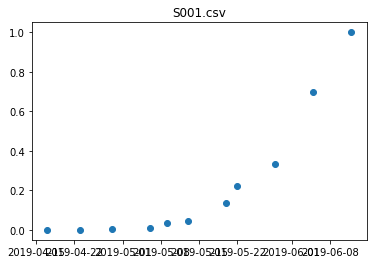

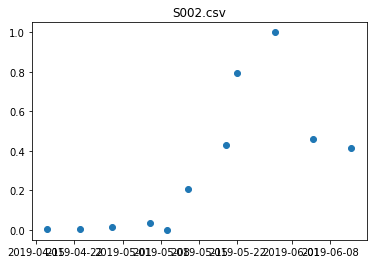

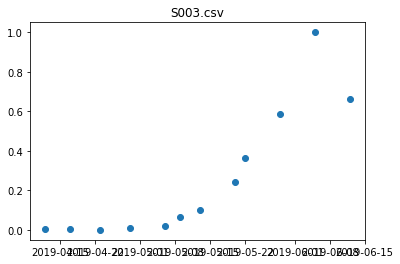

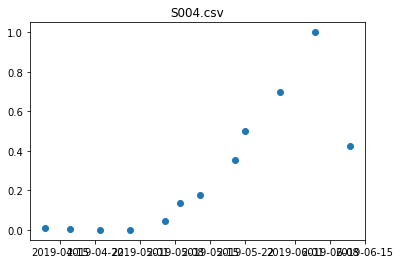

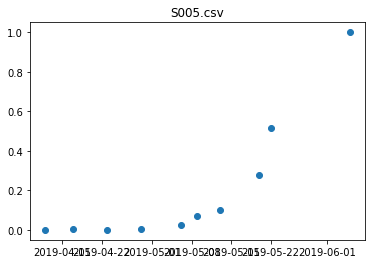

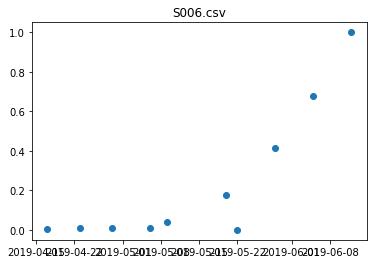

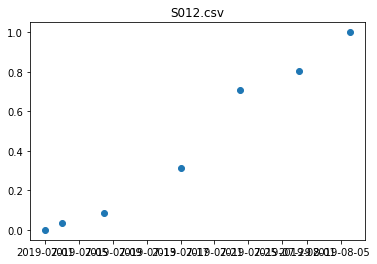

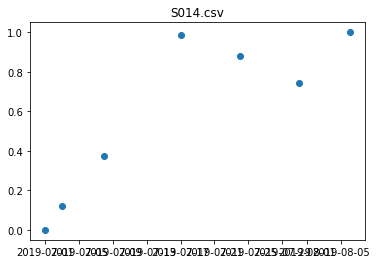

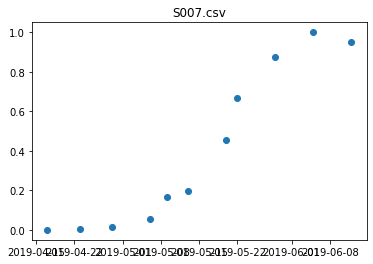

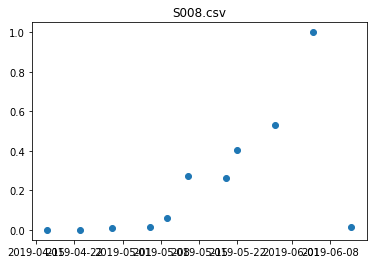

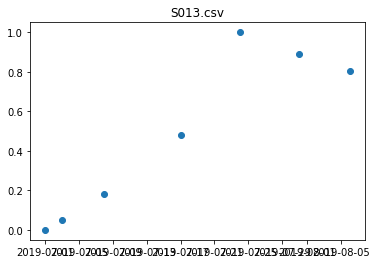

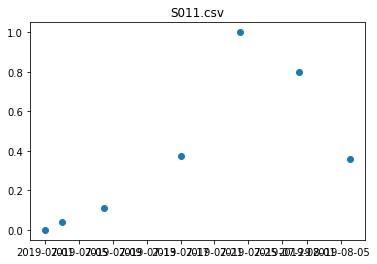

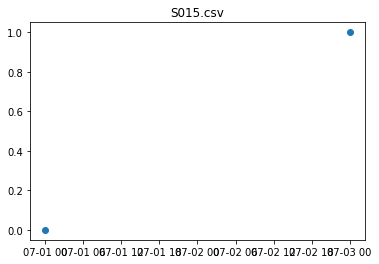

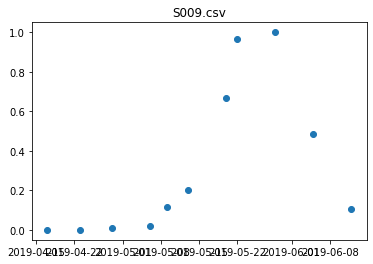

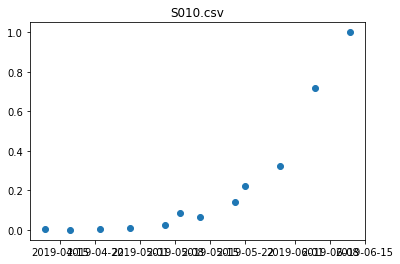

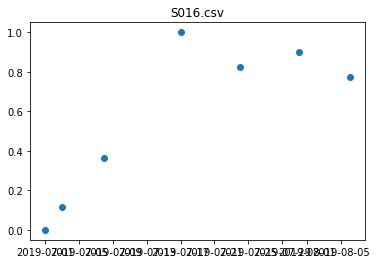

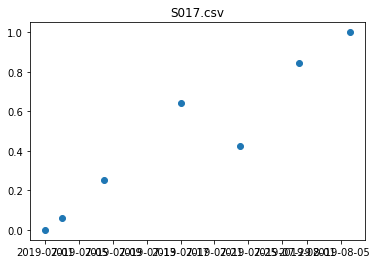

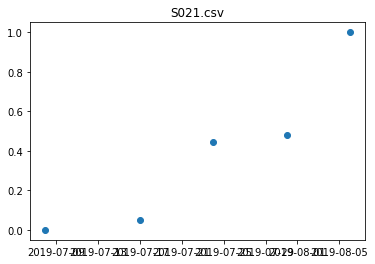

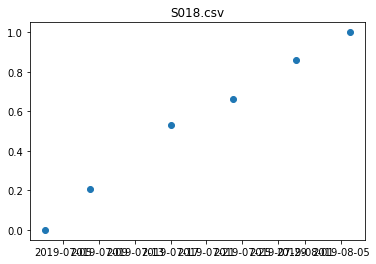

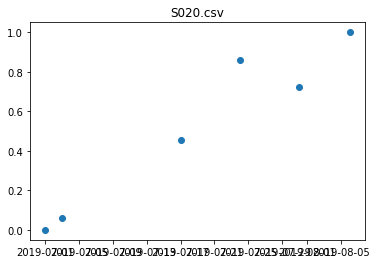

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import os 
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime 


if __name__=="__main__":
  min_max_scaler = MinMaxScaler()
  directory = '/content/drive/MyDrive/Research/BasilProject/DATA'
  for sample in os.listdir(directory):
    if sample.__contains__('.csv'):
      sample_path = os.path.join(directory, sample)
      data = pd.read_csv(sample_path)
      x_val = []
      dates =  np.asarray(data.Date)
      for vals in dates:
        val = vals.split('-')
        x_val.append(datetime.datetime(int(val[2]), int(val[0]), int(val[1])))
      normal_growth = min_max_scaler.fit_transform(np.asarray(data.Value).reshape(-1,1))
      x_val.sort
      plt.title(sample)
      plt.plot_date(x_val, normal_growth, xdate=True, ydate=False,)
      plt.show()
  
      

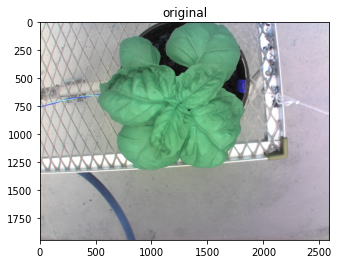

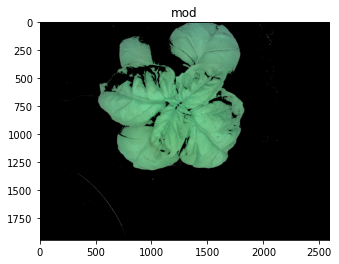

3442545


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


def green_extract(rgb):
    mod = rgb
    length, width, extra = rgb.shape
    grn_pix_count = 0
    for i in range(length):
        for j in range(width):
            if (mod[i, j, 0] < 125 and mod[i, j, 0] > 50) and mod[i, j, 1] > 135 and (mod[i, j, 2] > 80 and mod[i, j, 2] < 165):
                grn_pix_count += 1
            else:
                mod[i, j, :] = 0

    return mod, grn_pix_count


def masking(bgr):
  length, width, extra = bgr.shape
  mask = cv.inRange(bgr, np.array([50,135,80]), np.array([125,255,165]))
  result = cv.bitwise_and(bgr, bgr, mask= mask)
  return result, np.count_nonzero(result)


if __name__ == "__main__":
    src = cv.imread('/content/drive/MyDrive/Research/BasilProject/DATA/S001/05-29-2019/594003.JPG')
    plt.figure()
    plt.title('original')
    plt.imshow(src)
    #mod, grn_pix_count = green_extract(src)
    mod, grn_pix_count = masking(src)
    plt.figure()
    plt.title("mod")
    plt.imshow(mod)
    plt.show()
    print(grn_pix_count)


In [ ]:
import datetime,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

directory = "G:\\copy\\New Format\\Sample 0{}\\analysis\\"
green_file = "green_index.txt"
sample_name = "Sample 0{}"

for i in range(11,22):
        data_file = open(os.path.join(directory.format(i),green_file),"r")

        x1,y1,x2,y2 = [],[],[],[]
        for line in data_file:

                data = line.split(",")
                d = data[0].split(".")
                dt = datetime.datetime(int(d[0]),int(d[1]),int(d[2]),int(d[3]),int(d[4]))
                green = int(data[1])
                if green > 0 and (int(d[-2]) >= 6 and int(d[-2]) <= 18):
                    x2.append(dt)
                    y2.append(green)
                    
        data_file.close

        #plot
        name = "green.jpg"
        full_name = os.path.join(directory.format(i),name)
        plt.figure(figsize=(1800/217,1200/217),dpi=217)
        plt.ylabel('green index')
        plt.title(sample_name.format(i))

        #plt.plot_date(x1,y1,'g-',xdate=True)
        plt.plot_date(x2,y2,'b-',xdate=True)
        #plt.show()
        plt.savefig(full_name)
        plt.clf()

In [ ]:
import pandas as pd

if __name__ == "__main__":
  header = ["date", "val"]
  data = [['Dec', 12],
          ['Mar', 28],
          ['jun', 13]]
  df = pd.DataFrame(data)
  df.to_csv('/content/drive/MyDrive/Research/BasilProject/DATA/file.csv', index=False, header=header)


# New Section